In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

Question:

How does an urban versus wild environment impact the frequency of various animals? Does human urbanization and infrastructure impact specific animals, which animals, and how does it impact them?

In [3]:
path = "/Users/jesserinskeys/Desktop/Project1/Resources/wildlife_dfm.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Date,Weathercode,Max Temperature,Min Temperature,Mean Temperature,Sunrise,Sunset,Total Precipitation,Total Rain,...,Species,Common.Name,Species.Diet,Number.of.Animals,Camera.Make,Camera.Model,Flash..Yes.or.No.,Bait.Used,Photos.per.trigger,Description_y
0,0,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,1,Bushnell,Agressor,No,None,3,NaN
1,1,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
2,2,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN
3,3,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,...,Lupus Familiaris,Domestic Dog,Carnivore,1,Bushnell,Agressor,No,None,3,NaN
4,4,2018-05-06,2,69.9,40.4,56.0,06:19:00,20:27:00,0.0,0.0,...,Sapiens,Human non-staff,Omnivore,2,Bushnell,Agressor,No,None,3,NaN


In [5]:
# Read in CSV file
path = "/Users/jesserinskeys/Desktop/Project1/Resources/Full-Dataset-(2018-2020).csv"
df = pd.read_csv(path)

# Remove un-needed columns
clean_df = df.drop(columns=["General.Project","Contact.Person.s.Last.Name","Timezone","Country","Camera.Make","Camera.Model","Flash..Yes.or.No.","Bait.Used","Photos.per.trigger","Description"])
clean_df.head()

#Filter to just Wasatch
clean_df = clean_df.loc[clean_df["General.Sampling.Period.Name"].str.contains("Wasatch Mountains"),:]
clean_df

clean_df['Date'] = pd.to_datetime(df['Date.Time']).dt.date
clean_df['Time'] = pd.to_datetime(df['Date.Time']).dt.time
clean_df['Year'] = pd.to_datetime(df['Date.Time']).dt.year
clean_df

,Station,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
0,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/6/18,17:21:06,2018-05-06 17:21:06,Mammalia,Primates,Hominidae,Homo,Sapiens,Human non-staff,Omnivore,1,2018-05-06,17:21:06,2018
1,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/6/18,17:30:29,2018-05-06 17:30:29,Mammalia,Primates,Hominidae,Homo,Sapiens,Human non-staff,Omnivore,2,2018-05-06,17:30:29,2018
2,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/6/18,17:36:20,2018-05-06 17:36:20,Mammalia,Primates,Hominidae,Homo,Sapiens,Human non-staff,Omnivore,2,2018-05-06,17:36:20,2018
3,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/6/18,18:13:36,2018-05-06 18:13:36,Mammalia,Carnivora,Canidae,Canis,Lupus Familiaris,Domestic Dog,Carnivore,1,2018-05-06,18:13:36,2018
4,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/6/18,18:13:36,2018-05-06 18:13:36,Mammalia,Primates,Hominidae,Homo,Sapiens,Human non-staff,Omnivore,2,2018-05-06,18:13:36,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93653,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),11/4/20,4:42:48,2020-11-04 04:42:48,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-11-04,04:42:48,2020
93732,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:04:46,2020-11-06 06:04:46,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:04:46,2020
93733,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:08:59,2020-11-06 06:08:59,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:08:59,2020
93734,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,20:59:13,2020-11-06 20:59:13,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,20:59:13,2020


In [6]:
#checking for each animal captured from the photos
pd.unique(clean_df['Common.Name'])

array(['Human non-staff', 'Domestic Dog', 'Northern Raccoon', 'Bicycle',
       'Red Fox', 'Puma', 'Bobcat', 'White-tailed Jackrabbit',
       'Mule Deer', 'Moose', 'Rock Squirrel', 'Striped Skunk',
       'American Beaver', 'Coyote', 'Domestic Cat',
       'Uinta Ground Squirrel', 'Elk aka Red Deer', 'American Badger',
       'North American Porcupine', 'Mountain Cottontail',
       'Domestic Horse', 'American Red Squirrel', 'American Black Bear',
       'Snowshoe Hare', 'Yellow-bellied Marmot',
       'Northern Flying Squirrel', 'Muskrat', 'Eastern Fox Squirrel'],
      dtype=object)

In [7]:
#removing objects and domestic animals
values = ['Human non-staff' , 'Bicycle' , 'Domestic Dog' , 'Domestic Cat', 'Domestic Horse']

animals_df = clean_df[clean_df['Common.Name'].isin(values) == False]
animals_df


,Station,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
26,d47168,Urban,-111.66430,40.64724,Wasatch Mountains (May - October 2018),5/6/18,22:42:02,2018-05-06 22:42:02,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-06,22:42:02,2018
71,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:10:27,2018-05-07 23:10:27,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:10:27,2018
72,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:11:40,2018-05-07 23:11:40,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:11:40,2018
73,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:13:10,2018-05-07 23:13:10,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:13:10,2018
74,d46250,Wild,-111.66509,40.72880,Wasatch Mountains (May - October 2018),5/7/18,4:52:55,2018-05-07 04:52:55,Mammalia,Carnivora,Canidae,Vulpes,Vulpes,Red Fox,Carnivore,1,2018-05-07,04:52:55,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93653,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),11/4/20,4:42:48,2020-11-04 04:42:48,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-11-04,04:42:48,2020
93732,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:04:46,2020-11-06 06:04:46,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:04:46,2020
93733,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:08:59,2020-11-06 06:08:59,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:08:59,2020
93734,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,20:59:13,2020-11-06 20:59:13,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,20:59:13,2020


In [8]:
#count number of each animal captured
animal_count = animals_df.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
animal_count

Common.Name
American Badger               28
American Beaver               28
American Black Bear           15
American Red Squirrel        645
Bobcat                       108
Coyote                       513
Eastern Fox Squirrel          17
Elk aka Red Deer             566
Moose                        716
Mountain Cottontail          174
Mule Deer                   8441
Muskrat                        8
North American Porcupine      79
Northern Flying Squirrel      74
Northern Raccoon            1938
Puma                         156
Red Fox                      551
Rock Squirrel                538
Snowshoe Hare                 21
Striped Skunk                494
Uinta Ground Squirrel        136
White-tailed Jackrabbit      105
Yellow-bellied Marmot         22
Name: Number.of.Animals, dtype: int64

<Axes: title={'center': 'Utah Wasatch Animals Photographed 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

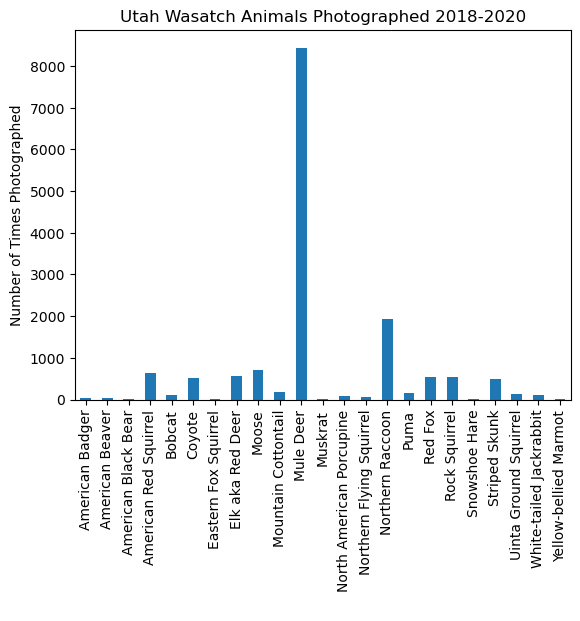

In [9]:
#bar plot of all animals photographed with how many times they were photographed.
animal_count.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Utah Wasatch Animals Photographed 2018-2020')

In [10]:
#Mule Deer and Northern Raccoon were photographed significantly more than the others so we will remove it and check the others.
animals2_count = animal_count.drop('Mule Deer')
animals2_count = animals2_count.drop('Northern Raccoon')

<Axes: title={'center': 'Utah Wasatch Animals Photographed (< 1000) 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

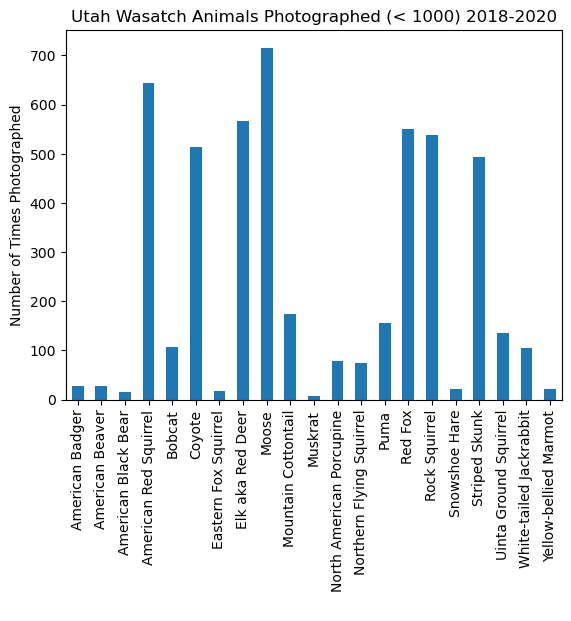

In [11]:
animals2_count.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Utah Wasatch Animals Photographed (< 1000) 2018-2020')

In [12]:
#selecting the animals photographed more than 1000 times each

animal_count3 = animal_count[['Mule Deer' ,'Northern Raccoon']]
animal_count3


Common.Name
Mule Deer           8441
Northern Raccoon    1938
Name: Number.of.Animals, dtype: int64

<Axes: title={'center': 'Utah Wasatch Animals Photographed (> 1000) 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

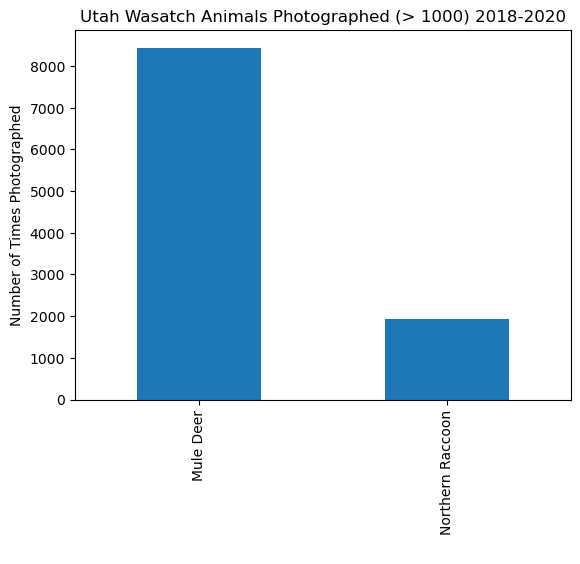

In [13]:
animal_count3.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Utah Wasatch Animals Photographed (> 1000) 2018-2020')

From the above graphs, we observe Mule Deer and Northern Raccoons are photographed significantly more than other species of wild animals in the wasatch. We will explore this further, maybe they are less impacted by human impact. 

In [14]:
#creating the urban specific dataframe

animals_urban = animals_df[animals_df['Wild.Urban'] == 'Urban']
animals_urban

,Station,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
26,d47168,Urban,-111.66430,40.64724,Wasatch Mountains (May - October 2018),5/6/18,22:42:02,2018-05-06 22:42:02,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-06,22:42:02,2018
270,d57730,Urban,-111.82605,40.55858,Wasatch Mountains (May - October 2018),5/9/18,19:37:57,2018-05-09 19:37:57,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2018-05-09,19:37:57,2018
379,d57730,Urban,-111.82605,40.55858,Wasatch Mountains (May - October 2018),5/10/18,6:43:38,2018-05-10 06:43:38,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2018-05-10,06:43:38,2018
443,d47222,Urban,-111.94250,40.81915,Wasatch Mountains (May - October 2018),5/10/18,0:43:42,2018-05-10 00:43:42,Mammalia,Rodentia,Castoridae,Castor,Canadensis,American Beaver,Herbivore,1,2018-05-10,00:43:42,2018
444,d47222,Urban,-111.94250,40.81915,Wasatch Mountains (May - October 2018),5/10/18,5:33:26,2018-05-10 05:33:26,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2018-05-10,05:33:26,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93176,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),10/29/20,7:33:58,2020-10-29 07:33:58,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-10-29,07:33:58,2020
93177,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),10/29/20,9:02:27,2020-10-29 09:02:27,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-10-29,09:02:27,2020
93178,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),10/29/20,20:22:58,2020-10-29 20:22:58,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-10-29,20:22:58,2020
93380,d71350,Urban,-111.81272,40.54350,Wasatch Mountains (April - November 2020),11/1/20,17:31:55,2020-11-01 17:31:55,Mammalia,Cetartiodactyla,Cervidae,Odocoileus,Hemionus,Mule Deer,Herbivore,1,2020-11-01,17:31:55,2020


In [15]:
#count the number of each animal observed in urban environments

urban_count = animals_urban.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
urban_count

Common.Name
American Badger                6
American Beaver               11
American Red Squirrel         43
Bobcat                        25
Coyote                       202
Eastern Fox Squirrel          16
Elk aka Red Deer              18
Moose                         27
Mountain Cottontail          109
Mule Deer                   1694
Muskrat                        8
North American Porcupine      25
Northern Raccoon            1499
Puma                           4
Red Fox                      533
Rock Squirrel                177
Snowshoe Hare                  1
Striped Skunk                 93
Uinta Ground Squirrel          9
White-tailed Jackrabbit       67
Name: Number.of.Animals, dtype: int64

<Axes: title={'center': 'Utah Wasatch Animals Urban 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

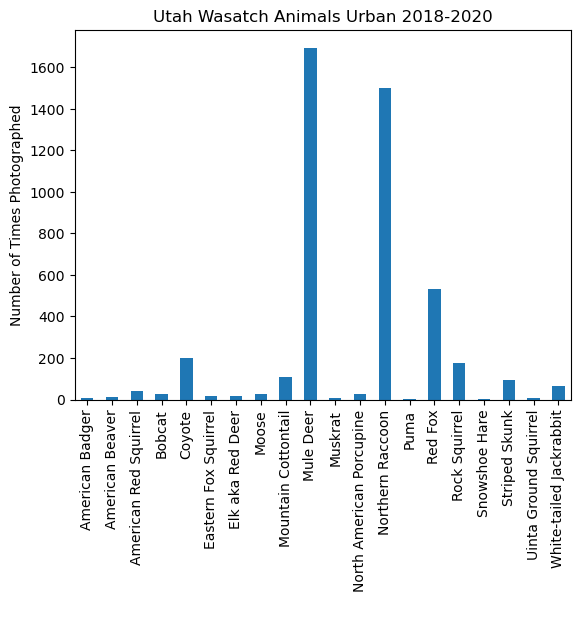

In [16]:
#bar graph of urban animals photographed

urban_count.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Utah Wasatch Animals Urban 2018-2020')

In [17]:
#creating the wild specific dataframe

animals_wild = animals_df[animals_df['Wild.Urban'] == 'Wild']
animals_wild

,Station,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
71,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:10:27,2018-05-07 23:10:27,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:10:27,2018
72,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:11:40,2018-05-07 23:11:40,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:11:40,2018
73,d47256,Wild,-111.70713,40.80159,Wasatch Mountains (May - October 2018),5/7/18,23:13:10,2018-05-07 23:13:10,Mammalia,Carnivora,Procyonidae,Procyon,Lotor,Northern Raccoon,Omnivore,1,2018-05-07,23:13:10,2018
74,d46250,Wild,-111.66509,40.72880,Wasatch Mountains (May - October 2018),5/7/18,4:52:55,2018-05-07 04:52:55,Mammalia,Carnivora,Canidae,Vulpes,Vulpes,Red Fox,Carnivore,1,2018-05-07,04:52:55,2018
75,d46250,Wild,-111.66509,40.72880,Wasatch Mountains (May - October 2018),5/7/18,19:05:18,2018-05-07 19:05:18,Mammalia,Carnivora,Felidae,Puma,Concolor,Puma,Carnivore,1,2018-05-07,19:05:18,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93597,d70808,Wild,-111.67988,40.79345,Wasatch Mountains (April - November 2020),11/2/20,10:21:37,2020-11-02 10:21:37,Mammalia,Rodentia,Sciuridae,Tamiasciurus,Hudsonicus,American Red Squirrel,Herbivore,1,2020-11-02,10:21:37,2020
93732,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:04:46,2020-11-06 06:04:46,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:04:46,2020
93733,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,6:08:59,2020-11-06 06:08:59,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,06:08:59,2020
93734,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),11/6/20,20:59:13,2020-11-06 20:59:13,Mammalia,Carnivora,Mephitidae,Mephitis,Mephitis,Striped Skunk,Omnivore,1,2020-11-06,20:59:13,2020


In [18]:
#count the number of each animal observed in wild environments

wild_count = animals_wild.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
wild_count

Common.Name
American Badger               22
American Beaver               17
American Black Bear           15
American Red Squirrel        602
Bobcat                        83
Coyote                       311
Eastern Fox Squirrel           1
Elk aka Red Deer             548
Moose                        689
Mountain Cottontail           65
Mule Deer                   6747
North American Porcupine      54
Northern Flying Squirrel      74
Northern Raccoon             439
Puma                         152
Red Fox                       18
Rock Squirrel                361
Snowshoe Hare                 20
Striped Skunk                401
Uinta Ground Squirrel        127
White-tailed Jackrabbit       38
Yellow-bellied Marmot         22
Name: Number.of.Animals, dtype: int64

<Axes: title={'center': 'Utah Wasatch Animals Wild 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

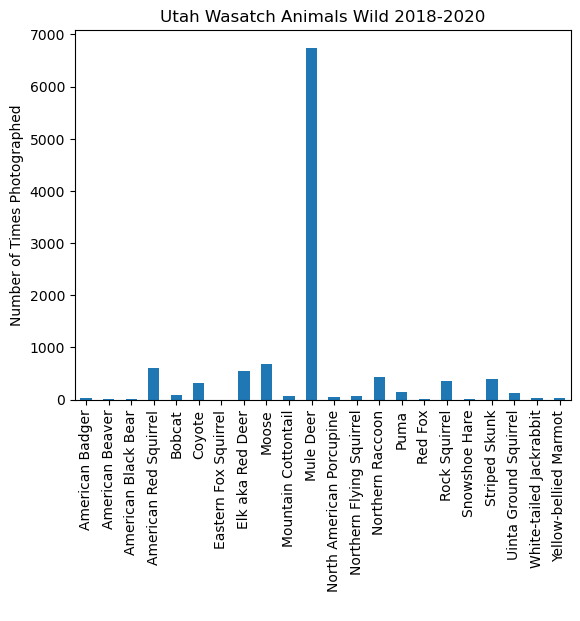

In [19]:
#bar chart of wild animals photographed

wild_count.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Utah Wasatch Animals Wild 2018-2020')

In [20]:
#looking at just the animals observed the most

wild_small = wild_count.drop('Mule Deer')

<Axes: title={'center': 'Animals Wild (no deer) 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

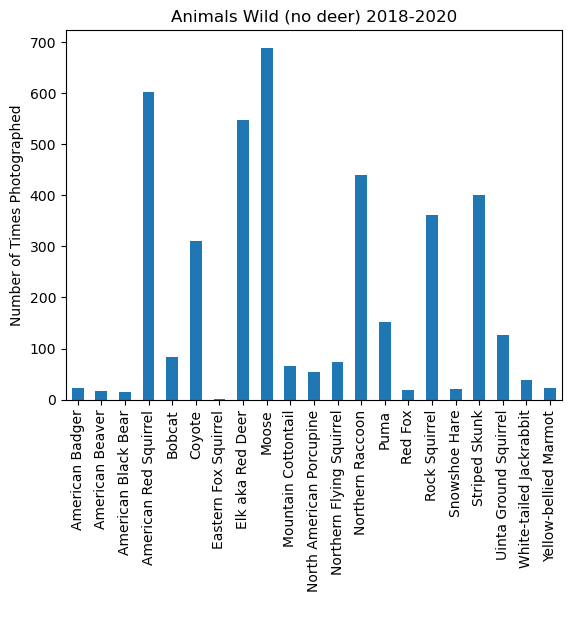

In [21]:
#bar chart of wild animals photographed without deer

wild_small.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Animals Wild (no deer) 2018-2020')

In [22]:
#merging wild and urban together to compare side by side
df_wild_urban = pd.merge(wild_small, urban_count, on='Common.Name')
df_wild_urban = df_wild_urban.rename(columns = {"Number.of.Animals_x":"Wild" , "Number.of.Animals_y": "Urban"})
df_wild_urban

,Wild,Urban
Common.Name,,
American Badger,22,6
American Beaver,17,11
American Red Squirrel,602,43
Bobcat,83,25
Coyote,311,202
Eastern Fox Squirrel,1,16
Elk aka Red Deer,548,18
Moose,689,27
Mountain Cottontail,65,109


In [23]:
wild_urban_transpose = df_wild_urban.transpose()
wild_urban_transpose

Common.Name,American Badger,American Beaver,American Red Squirrel,Bobcat,Coyote,Eastern Fox Squirrel,Elk aka Red Deer,Moose,Mountain Cottontail,North American Porcupine,Northern Raccoon,Puma,Red Fox,Rock Squirrel,Snowshoe Hare,Striped Skunk,Uinta Ground Squirrel,White-tailed Jackrabbit
Wild,22,17,602,83,311,1,548,689,65,54,439,152,18,361,20,401,127,38
Urban,6,11,43,25,202,16,18,27,109,25,1499,4,533,177,1,93,9,67


<Axes: title={'center': 'Wasatch Animals Urban vs Wild 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

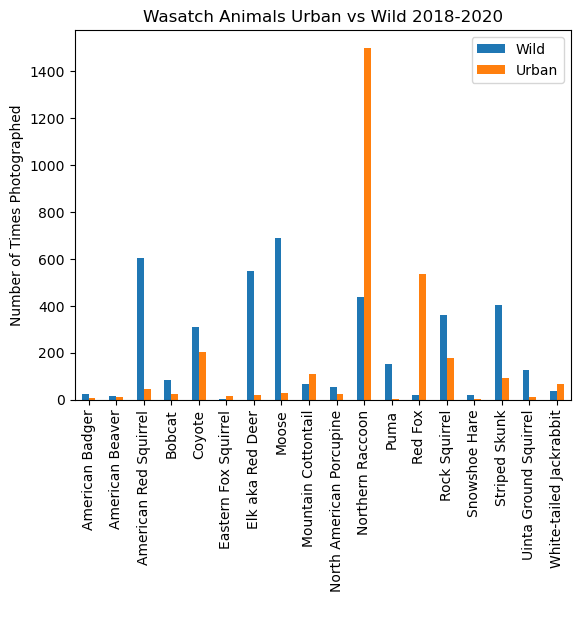

In [24]:
#bar chart of wild and urban animals photographed without deer

df_wild_urban.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Wasatch Animals Urban vs Wild 2018-2020')

In [25]:
#perform a t-test to determine if there is any significant difference between number of animals oberved in the wild and in urban environments overall. We test at 95% confidence.
#Null Hypothesis: There is no sigfinicant difference between number of animals observed in the wild versus urban.

ttest_ind(df_wild_urban['Wild'], df_wild_urban['Urban'])

Ttest_indResult(statistic=0.5992080549666448, pvalue=0.5530062751315148)

Observation:

With a p-value of 0.73 we fail to reject the null hypthesis. This is not to say specific animals do not differ significantly. Later below we will do t-tests for six specific animals who are most likely to have a significant difference in photographed frequency between wild and urban.

In [26]:
#split the dataset by year

animals2018 = animals_df[animals_df['Year'] == 2018]
animals2019 = animals_df[animals_df['Year'] == 2019]
animals2020 = animals_df[animals_df['Year'] == 2020]

In [27]:
#Counts by year

count_2018 = animals2018.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_2019 = animals2019.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_2020 = animals2020.groupby(by=["Common.Name"])["Number.of.Animals"].sum()

In [28]:
#merge by year

merge1_df_year = pd.merge(count_2018, count_2019, on='Common.Name')
by_year = pd.merge(merge1_df_year, count_2020, on='Common.Name')
by_year = by_year.rename(columns = {"Number.of.Animals_x":"2018" , "Number.of.Animals_y": "2019", "Number.of.Animals": "2020"})
by_year

,2018,2019,2020
Common.Name,,,
American Black Bear,1,12,2
American Red Squirrel,1,299,345
Bobcat,45,47,16
Coyote,145,340,28
Elk aka Red Deer,165,239,162
Moose,276,393,47
Mountain Cottontail,6,123,45
Mule Deer,3548,4294,599
North American Porcupine,19,56,4


<Axes: title={'center': 'Wasatch Animals by Year 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

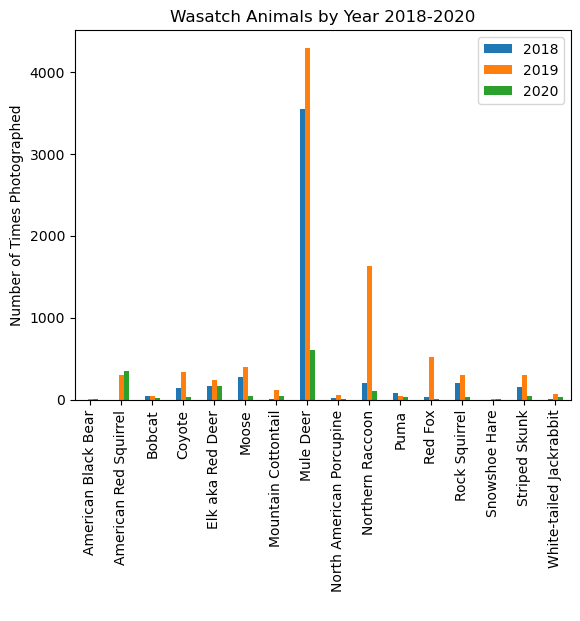

In [29]:
#bar chart by year

by_year.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Wasatch Animals by Year 2018-2020')

In [30]:
#split by wild and urban

urban_df_2018 = animals_urban[animals_urban['Year'] == 2018]
urban_df_2019 = animals_urban[animals_urban['Year'] == 2019]
urban_df_2020 = animals_urban[animals_urban['Year'] == 2020]

wild_df_2018 = animals_wild[animals_wild['Year'] == 2018]
wild_df_2019 = animals_wild[animals_wild['Year'] == 2019]
wild_df_2020 = animals_wild[animals_wild['Year'] == 2020]


In [31]:
#get counts of each year for each animal for urban

count_urban_2018 = urban_df_2018.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_urban_2019 = urban_df_2019.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_urban_2020 = urban_df_2020.groupby(by=["Common.Name"])["Number.of.Animals"].sum()

In [32]:
#merge each year for urban data

merge2_df_year = pd.merge(count_urban_2018, count_urban_2019, on='Common.Name')
urban_year_df = pd.merge(merge2_df_year, count_urban_2020, on='Common.Name')
urban_year_df = urban_year_df.rename(columns = {"Number.of.Animals_x":"2018" , "Number.of.Animals_y": "2019", "Number.of.Animals": "2020"})
urban_year_df

,2018,2019,2020
Common.Name,,,
Bobcat,13,11,1
Coyote,16,182,4
Mule Deer,315,1232,147
Northern Raccoon,36,1446,17
Red Fox,20,506,7
Rock Squirrel,63,111,3
Striped Skunk,9,83,1


<Axes: title={'center': 'Wasatch Animals Urban by Year 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

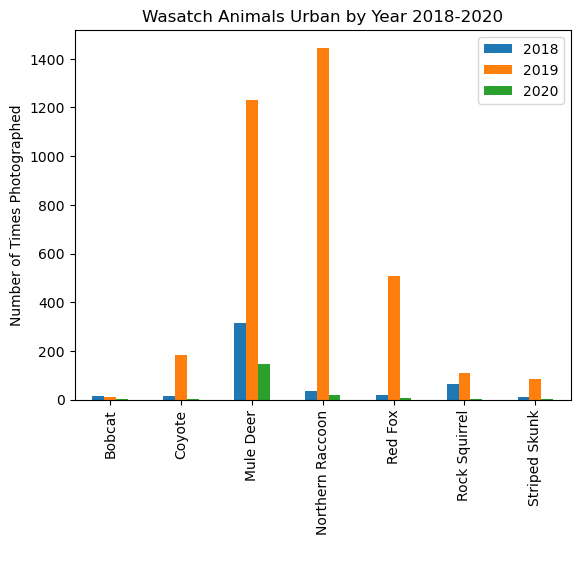

In [33]:
#by year plot of urban

urban_year_df.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Wasatch Animals Urban by Year 2018-2020')

Some animals were dropped if they were not photographed at least once each year. With no data it is not appropriate to include to compare.

In [34]:
#get counts of each year for each animal for wild

count_wild_2018 = wild_df_2018.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_wild_2019 = wild_df_2019.groupby(by=["Common.Name"])["Number.of.Animals"].sum()
count_wild_2020 = wild_df_2020.groupby(by=["Common.Name"])["Number.of.Animals"].sum()

In [35]:
#merge the wild data

merge3_df_year = pd.merge(count_wild_2018, count_wild_2019, on='Common.Name')
wild_year_df = pd.merge(merge3_df_year, count_wild_2020, on='Common.Name')
wild_year_df = wild_year_df.rename(columns = {"Number.of.Animals_x":"2018" , "Number.of.Animals_y": "2019", "Number.of.Animals": "2020"})
wild_year_df

,2018,2019,2020
Common.Name,,,
American Black Bear,1,12,2
American Red Squirrel,1,258,343
Bobcat,32,36,15
Coyote,129,158,24
Elk aka Red Deer,165,221,162
Moose,269,373,47
Mountain Cottontail,6,14,45
Mule Deer,3233,3062,452
North American Porcupine,17,33,4


<Axes: title={'center': 'Wasatch Animals Wild by Year 2018-2020'}, xlabel=' ', ylabel='Number of Times Photographed'>

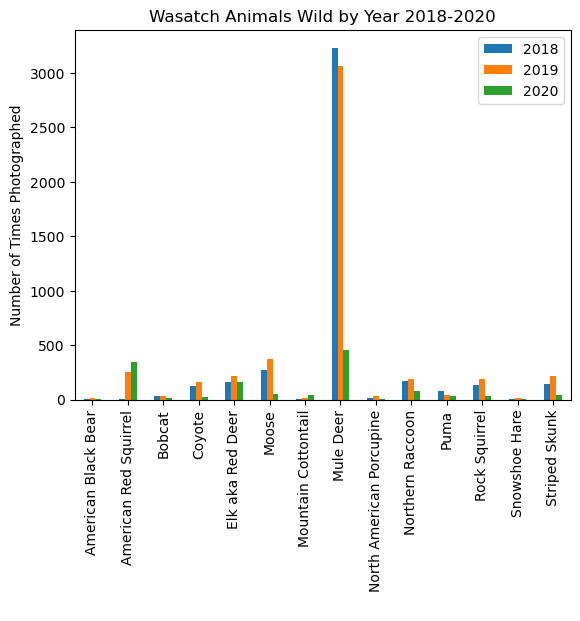

In [36]:
#by year plot of wild

wild_year_df.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Wasatch Animals Wild by Year 2018-2020')

In [37]:
#removing Mule Deer

wild_year_df2 = wild_year_df.drop('Mule Deer')

<Axes: title={'center': 'Wasatch Animals Wild (no Deer) by Year'}, xlabel=' ', ylabel='Number of Times Photographed'>

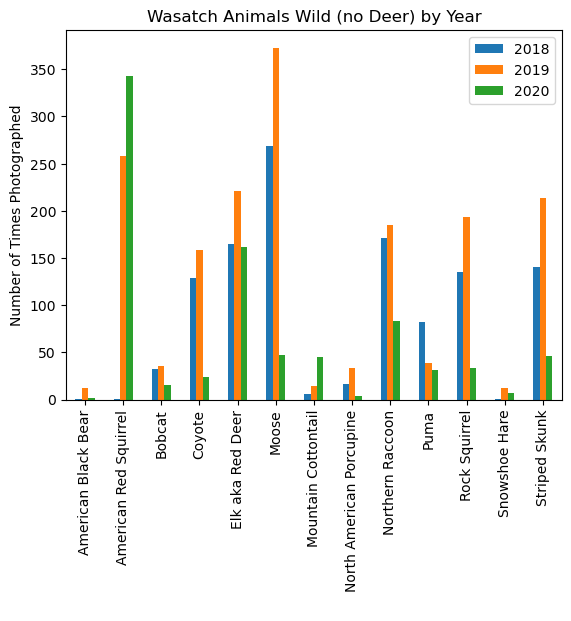

In [38]:
#by year plot of urban

wild_year_df2.plot.bar(xlabel = " " , ylabel = "Number of Times Photographed", title = 'Wasatch Animals Wild (no Deer) by Year')

In [39]:
#split by wild and urban for each year

wild_2018 = animals2018[animals2018['Wild.Urban'] == 'Wild']
wild_2019 = animals2019[animals2019['Wild.Urban'] == 'Wild']
wild_2020 = animals2020[animals2020['Wild.Urban'] == 'Wild']

urban_2018 = animals2018[animals2018['Wild.Urban'] == 'Urban']
urban_2019 = animals2019[animals2019['Wild.Urban'] == 'Urban']
urban_2020 = animals2020[animals2020['Wild.Urban'] == 'Urban']


In [40]:
#get wild count for each year for specific animals with most difference

groups = ['American Red Squirrel' , 'Elk aka Red Deer' , 'Moose' , 'Striped Skunk', 'Northern Raccoon', 'Red Fox', 'Mule Deer']

wild_2018_focus = wild_2018[wild_2018['Common.Name'].isin(groups) == True]
grouped_2018 = wild_2018_focus.groupby('Common.Name').count()
grouped2018_wild = grouped_2018['Number.of.Animals']

wild_2019_focus = wild_2019[wild_2019['Common.Name'].isin(groups) == True]
grouped_2019 = wild_2019_focus.groupby('Common.Name').count()
grouped2019_wild = grouped_2019['Number.of.Animals']

wild_2020_focus = wild_2020[wild_2020['Common.Name'].isin(groups) == True]
grouped_2020 = wild_2020_focus.groupby('Common.Name').count()
grouped2020_wild = grouped_2020['Number.of.Animals']

In [41]:
#get urban count for each year for specific animals

urban_2018_focus = urban_2018[urban_2018['Common.Name'].isin(groups) == True]
group_2018 = urban_2018_focus.groupby('Common.Name').count()
grouped2018_urban = group_2018['Number.of.Animals']

urban_2019_focus = urban_2019[urban_2019['Common.Name'].isin(groups) == True]
group_2019 = urban_2019_focus.groupby('Common.Name').count()
grouped2019_urban = group_2019['Number.of.Animals']

urban_2020_focus = urban_2020[urban_2020['Common.Name'].isin(groups) == True]
group_2020 = urban_2020_focus.groupby('Common.Name').count()
grouped2020_urban = group_2020['Number.of.Animals']

In [42]:
grouped2020_urban

Common.Name
American Red Squirrel      2
Mule Deer                110
Northern Raccoon          15
Red Fox                    7
Striped Skunk              1
Name: Number.of.Animals, dtype: int64

In [43]:
#Create wild dataframe by year

wild_df = pd.DataFrame({
    "Year": ['2018' , '2019' , '2020'],
    "American Red Squirrel": [1, 257, 343],
    "Elk": [104, 181, 120],
    "Moose": [246, 367, 47],
    "Striped Skunk": [137, 214, 46],
    "Red Fox": [8, 10, 0],
    "Northern Raccoon": [164, 175, 79],
    "Mule Deer": [2694, 2701, 395]
})

wild_df.set_index('Year')

,American Red Squirrel,Elk,Moose,Striped Skunk,Red Fox,Northern Raccoon,Mule Deer
Year,,,,,,,
2018,1,104,246,137,8,164,2694
2019,257,181,367,214,10,175,2701
2020,343,120,47,46,0,79,395


In [44]:
#Create urban dataframe by year

urban_df = pd.DataFrame({
    "Year": ['2018' , '2019' , '2020'],
    "American Red Squirrel": [0, 41, 2],
    "Elk": [0, 16, 0],
    "Moose": [6, 19, 0],
    "Striped Skunk": [8, 78, 1],
    "Red Fox": [20, 502, 7],
    "Northern Raccoon": [36, 1250, 15],
    "Mule Deer": [278, 1058, 110]
})

urban_df.set_index('Year')


,American Red Squirrel,Elk,Moose,Striped Skunk,Red Fox,Northern Raccoon,Mule Deer
Year,,,,,,,
2018,0,0,6,8,20,36,278
2019,41,16,19,78,502,1250,1058
2020,2,0,0,1,7,15,110


t-test at 95% confidence interval to determine if the 6 animals with most likely difference between wild and urban frequency holds significant difference.
Null Hypothesis: There is no significant difference between animal frequency in urban and wild settings for each specified animal.


In [45]:
#perform the t-tests

ttest_ind(wild_df['American Red Squirrel'], urban_df['American Red Squirrel']) #fail to reject, p=0.147
ttest_ind(wild_df['Elk'], urban_df['Elk']) #reject the null hypothesis, p=0.0057
ttest_ind(wild_df['Moose'], urban_df['Moose']) #fail to reject the null hypothesis, but close enough to study further, p=0.086
ttest_ind(wild_df['Striped Skunk'], urban_df['Striped Skunk']) #fail to reject the nully hyopthesis, p=0.13
ttest_ind(wild_df['Red Fox'], urban_df['Red Fox']) #fail to reject the null hypothesis, p=0.355
ttest_ind(wild_df['Northern Raccoon'], urban_df['Northern Raccoon']) #fail to reject the null hypothesis, p=0.51
ttest_ind(wild_df['Mule Deer'], urban_df['Mule Deer']) #fail to reject the null hypothesis, p=0.15




Ttest_indResult(statistic=1.763290393891309, pvalue=0.15262960293671698)

According the these data and the above t-tests, Elk and Moose were photographed significantly more in wild environments than urban. These two animals are likely siginificantly negatively impacted by human infrastructure. Conversely, the Red Fox, Northern Raccoon, and Mule Deer were photographed with relatively similar frequency in both wild and urban environments. This could mean they are less impacted by human infrastructure. 

The next step would be to identify the wild site locations the two animals found most in the wild were photographed, count how often they were photographed at each of these sites, and flag the sites they were photographed the most as sites unfit for human urbanization, construction, or infrastructure. We will locate these stations below.

,T-test p-value,Reject Null Hypothesis?
Animal,,
American Red Squirrel,0.1470,No
Elk,0.0057,Yes
Moose,0.0860,Yes
Striped Skunk,0.1300,No
Red Fox,0.3550,No
Northern Raccoon,0.5100,No
Mule Deer,0.1500,No


In [46]:

#create a dataframe focusing on the four animals of interest in the wild setting.

groups = ['Elk' , 'Moose']

wild_focus = animals_wild[animals_wild['Common.Name'].isin(groups) == True]
wild_focus



,Station,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
341,d46708,Wild,-111.67848,40.80360,Wasatch Mountains (May - October 2018),5/9/18,14:59:42,2018-05-09 14:59:42,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2018-05-09,14:59:42,2018
425,d46708,Wild,-111.67848,40.80360,Wasatch Mountains (May - October 2018),5/10/18,17:28:13,2018-05-10 17:28:13,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2018-05-10,17:28:13,2018
426,d46708,Wild,-111.67848,40.80360,Wasatch Mountains (May - October 2018),5/10/18,17:29:23,2018-05-10 17:29:23,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2018-05-10,17:29:23,2018
427,d46857,Wild,-111.69410,40.63780,Wasatch Mountains (May - October 2018),5/10/18,8:23:49,2018-05-10 08:23:49,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2018-05-10,08:23:49,2018
1415,d47045,Wild,-111.70751,40.76412,Wasatch Mountains (May - October 2018),5/13/18,14:08:55,2018-05-13 14:08:55,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2018-05-13,14:08:55,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88998,d70527,Wild,-111.76394,40.80299,Wasatch Mountains (April - November 2020),10/1/20,20:27:33,2020-10-01 20:27:33,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2020-10-01,20:27:33,2020
89241,d70527,Wild,-111.76394,40.80299,Wasatch Mountains (April - November 2020),10/3/20,7:49:18,2020-10-03 07:49:18,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2020-10-03,07:49:18,2020
89417,d71228,Wild,-111.69187,40.60809,Wasatch Mountains (April - November 2020),10/5/20,18:28:22,2020-10-05 18:28:22,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2020-10-05,18:28:22,2020
89418,d71226,Wild,-111.77295,40.79888,Wasatch Mountains (April - November 2020),10/5/20,19:14:55,2020-10-05 19:14:55,Mammalia,Cetartiodactyla,Cervidae,Alces,Alces,Moose,Herbivore,1,2020-10-05,19:14:55,2020


In [47]:
#Looking at each station value; how many animals from above were photographed at each station, then sorting by stations with most activity.

focus_count = wild_focus.groupby('Station').count()
wild_focus_sort = focus_count.sort_values(by = 'Number.of.Animals', ascending=False)
wild_focus_sort

,Wild.Urban,Longitude,Latitude,General.Sampling.Period.Name,Photo.Date,Photo.Time,Date.Time,Class,Order,Family,Genus,Species,Common.Name,Species.Diet,Number.of.Animals,Date,Time,Year
Station,,,,,,,,,,,,,,,,,,
d60066,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
d65901,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
d47212,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
d65909,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
d55071,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d61797,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
d61798,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
d47177,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Based on the above findings, I would flag the following stations to obseved closely as potential protection sites:

d65901, d47212, d60066, d65909, d55071

In [53]:
#T-test dataframe

ttest_df = pd.DataFrame({
    "Animal": ['American Red Squirrel' , 'Elk', 'Moose', 'Striped Skunk', 'Red Fox', 'Northern Raccoon', 'Mule Deer'],
    "T-test p-value": [0.147, 0.0057, 0.086, 0.13, 0.355, 0.51, 0.15],
    "Reject Null Hypothesis?": ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No']
})

ttest_df.set_index('Animal')
ttest_df

,Animal,T-test p-value,Reject Null Hypothesis?
0,American Red Squirrel,0.1470,No
1,Elk,0.0057,Yes
2,Moose,0.0860,Yes
3,Striped Skunk,0.1300,No
4,Red Fox,0.3550,No
5,Northern Raccoon,0.5100,No
6,Mule Deer,0.1500,No
